#Introduction:

This notebook will guide you through different feature engineering techniques covered in the class.

# Feature Encoding
Feature encoding is used to turn categorical (non-numerical) features into numerical values. Since most machine-learning algorithms accepts numerical values as input, it is essential to transform categorical values into numerical ones. Feature encoding can also help capture non-linear relationships between different features. We will explore different feature encoding techniques in this section.

## Label Encoding
Encode categories as ordered integers. This is usually done for encoding target labels (i.e., the predicted output `y`, not the input `x`). However, it is okay to use for input feature some decision tree-based methods.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example dataset
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Red', 'Green', 'Red', 'Blue', 'Red', 'Green', 'Red']})

# Initialize a LabelEncoder instance
encoder = LabelEncoder()

# Perform label encoding
data['Color_LabelEncoded'] = encoder.fit_transform(data['Color'])

# Print the modified dataset
print(data)

   Color  Color_LabelEncoded
0    Red                   2
1   Blue                   0
2  Green                   1
3    Red                   2
4  Green                   1
5    Red                   2
6   Blue                   0
7    Red                   2
8  Green                   1
9    Red                   2


## Exercise
Add another column to the dataset that stores the inverse transforms of the `Color_LabelEncoded` column (don't just copy the `Color` column!)

In [ ]:
#YOUR CODE

## One hot encoding
One hot encoding can be used to encode categorical features as a one-hot numeric array. It creates binary columns for each unique category in the variable, where a value of 1 indicates the presence of that category and 0 indicates its absence.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Example dataset

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(data[['Color']]).toarray()

# Create a dataframe with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Color']))

# Print the encoded dataframe
print(encoded_df)

   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         0.0          0.0        1.0
4         0.0          1.0        0.0
5         0.0          0.0        1.0
6         1.0          0.0        0.0
7         0.0          0.0        1.0
8         0.0          1.0        0.0
9         0.0          0.0        1.0


## Excercise
Enhance the one-hot encoding by handling unseen categories. Also, drop the first cacategory in the feature.


In [ ]:
#YOUR CODE

## Frequency encoding
Frequency encoding is used to represent categorical variables by their frequency or occurrence in the dataset. It replaces each category with the percentage or count of occurrences of that category in the dataset. Frequency encoding can help capture valuable information about the relationship between a category and the target variable.




In [ ]:
# Compute the frequency of each category
frequency = data['Color'].value_counts(normalize=True)

# Map the frequency values to the original categories
data['Color_Frequency'] = data['Color'].map(frequency)

# Print the modified dataset
print(data)

   Color  Color_LabelEncoded  Color_Frequency
0    Red                   2              0.5
1   Blue                   0              0.2
2  Green                   1              0.3
3    Red                   2              0.5
4  Green                   1              0.3
5    Red                   2              0.5
6   Blue                   0              0.2
7    Red                   2              0.5
8  Green                   1              0.3
9    Red                   2              0.5


## Target Mean Encoding
Target mean encoding used to represent categorical variables by the mean or average of the target variable within each category. It replaces each category with the average target value of that category. Target mean encoding can capture the relationship between a category and the target variable, and it is particularly useful for categorical variables with high cardinality.



In [ ]:
# We are changing the dataset by adding target column
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Red', 'Green', 'Red', 'Blue', 'Red', 'Green', 'Red'],
                     'Target': [1, 1, 0, 1, 0, 1, 0, 1, 1, 0]})

# Compute the mean target value for each category
mean_target = data.groupby('Color')['Target'].mean()

# Map the mean target values to the original categories
data['Color_TargetMean'] = data['Color'].map(mean_target)

# Print the modified dataset
print(data)

   Color  Target  Color_TargetMean
0    Red       1          0.800000
1   Blue       1          0.500000
2  Green       0          0.333333
3    Red       1          0.800000
4  Green       0          0.333333
5    Red       1          0.800000
6   Blue       0          0.500000
7    Red       1          0.800000
8  Green       1          0.333333
9    Red       0          0.800000


Target mean smoothing is used when some categories may have very few training examples, as otherwise the mean target may assume extreme values for these categories. It does so by mixing the target mean for the category with global mean of the target variable.Categories with fewer examples get more affected by global weight compared to categories with more examples.

In [ ]:
import numpy as np


# the weight given to global mean
weight = 0.25

# Compute the global mean target value
global_mean = data['Target'].mean()

# Compute the per-category count and mean target value
category_stats = data.groupby('Color')['Target'].agg(['count', 'mean'])
category_stats['smoothed_mean'] = (category_stats['count'] * category_stats['mean'] + global_mean * weight) / (category_stats['count'] + weight)

# Map the smoothed mean target values to the original categories
data['Color_TargetMean_Smoothed'] = data['Color'].map(category_stats['smoothed_mean'])

# Print the modified dataset
print(data)

   Color  Target  Color_TargetMean  Color_TargetMean_Smoothed
0    Red       1          0.800000                   0.790476
1   Blue       1          0.500000                   0.511111
2  Green       0          0.333333                   0.353846
3    Red       1          0.800000                   0.790476
4  Green       0          0.333333                   0.353846
5    Red       1          0.800000                   0.790476
6   Blue       0          0.500000                   0.511111
7    Red       1          0.800000                   0.790476
8  Green       1          0.333333                   0.353846
9    Red       0          0.800000                   0.790476


### Exercise
What should happen when `weight=0` and when` weight=infinity`. Verify with code.



In [ ]:
#YOUR CODE

### K-fold holdout
Target mean encoding with k-fold holdout is a technique used to minimize data leakage during target encoding. It involves splitting the dataset into k folds and encoding the categorical variables using the mean target value from the remaining folds. This approach helps prevent the model from learning information about the target variable from the validation or test folds, reducing the risk of overfitting.


In [ ]:
from sklearn.model_selection import KFold

# Define the number of folds for k-fold holdout
k = 5

# Initialize a new column for the target mean encoding
data['Color_TargetMean_Encoded_5Fold'] = 0.0

# Perform k-fold holdout and calculate target mean encoding
kf = KFold(n_splits=k, shuffle=True, random_state=42)
for train_index, val_index in kf.split(data):
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    mean_target = X_train.groupby('Color')['Target'].mean()
    data.loc[val_index, 'Color_TargetMean_Encoded_5Fold'] = X_val['Color'].map(mean_target)

# Print the modified dataset
print(data)

   Color  Target  Color_TargetMean  Color_TargetMean_Smoothed  \
0    Red       1          0.800000                   0.790476   
1   Blue       1          0.500000                   0.511111   
2  Green       0          0.333333                   0.353846   
3    Red       1          0.800000                   0.790476   
4  Green       0          0.333333                   0.353846   
5    Red       1          0.800000                   0.790476   
6   Blue       0          0.500000                   0.511111   
7    Red       1          0.800000                   0.790476   
8  Green       1          0.333333                   0.353846   
9    Red       0          0.800000                   0.790476   

   Color_TargetMean_Encoded_5Fold  
0                        0.666667  
1                        0.000000  
2                        0.500000  
3                        0.750000  
4                        0.500000  
5                        0.666667  
6                        1.00000

### Exercise: Modify the above code to perform leave-one-out target mean encoding.

### Feature Imputation
Feature imputation is a crucial step in data preprocessing when dealing with missing values. It involves filling in missing values with appropriate estimates to ensure the data is complete and suitable for analysis. For numerical data, we can replace with mean or median of the distribution. For categorical data, they can replaced by the most frequent value along each column.

Refernce: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [ ]:
# Example code for numerical data
from sklearn.impute import SimpleImputer

# Example dataset
data = pd.DataFrame({'Age': [25, 30, np.nan, 35, 40, 45],
                     'Income': [50000, np.nan, 60000, 70000, np.nan, 800000]})

# Initialize SimpleImputer for mean imputation
imputer = SimpleImputer(strategy='mean')

# Perform mean imputation on numerical data
data['Age_Imputed'] = imputer.fit_transform(data[['Age']])
data['Income_Imputed'] = imputer.fit_transform(data[['Income']])

# Print the modified dataset
print(data)

    Age    Income  Age_Imputed  Income_Imputed
0  25.0   50000.0         25.0         50000.0
1  30.0       NaN         30.0        245000.0
2   NaN   60000.0         35.0         60000.0
3  35.0   70000.0         35.0         70000.0
4  40.0       NaN         40.0        245000.0
5  45.0  800000.0         45.0        800000.0


In [ ]:
# Example code for categorical data

# Example dataset
data = pd.DataFrame({'Color': ['Red', 'Blue', np.nan, 'Green', 'Red', 'Blue'],
                     'Size': ['Small', 'Medium', 'Large', np.nan, 'Small', 'Medium']})

# Initialize SimpleImputer for mode imputation
imputer = SimpleImputer(strategy='most_frequent')

# Perform most frequent (mode) imputation on categorical data
data['Color_Imputed'] = imputer.fit_transform(data[['Color']])
data['Size_Imputed'] = imputer.fit_transform(data[['Size']])

# Print the modified dataset
print(data)

   Color    Size Color_Imputed Size_Imputed
0    Red   Small           Red        Small
1   Blue  Medium          Blue       Medium
2    NaN   Large          Blue        Large
3  Green     NaN         Green       Medium
4    Red   Small           Red        Small
5   Blue  Medium          Blue       Medium


### Exercise
Replace the mean with median for the categorical data. Which one is more suitable for this dataset?


In [ ]:
#YOUR CODE

## Target Transformation
Target transformation is used to transform the target variable to improve its distribution or relationship with the input features. This can help improve the performance of some machine learning models. It can be especially helpful when we have some prior knowledge about target distribution. Below we will show an example with a toy dataset where the output follows exponential distribution, and as such applying log transform improves ther performance of the model.




In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate random dataset
n_samples = 100
X = np.random.rand(n_samples, 1) * 5
y = np.exp(X.flatten()) + np.random.randn(n_samples)

# Fit a linear regression model on the original target variable
regressor = LinearRegression()
regressor.fit(X, y)
predictions = regressor.predict(X)
mse_original = mean_squared_error(y, predictions)

# Apply logarithmic transformation to the target variable
y_log = np.log1p(y)

# Fit a linear regression model on the transformed target variable
regressor_log = LinearRegression()
regressor_log.fit(X, y_log)
predictions_log = np.expm1(regressor_log.predict(X))
mse_log_transform = mean_squared_error(y, predictions_log)

# Print mean squared errors
print(f"MSE (Original): {mse_original:.2f}")
print(f"MSE (Log Transform): {mse_log_transform:.2f}")

MSE (Original): 334.28
MSE (Log Transform): 27.75


# Finding Outliers:

Outliers are data objects that deviate significantly from normal objects as if it were generated by a different mechanism. They are different from noise data. Noise is random error or variance in a measured variable which should be removed. Outliers are data objects that violate mechanism or distribution that generates normal data. But detecting them can be beneficial in applications such as credit card fraud detection.

We can discover outliers with visualization tools or statistical methodologies
- Standard deviation
- Z-scores
- IQR score
- Box plot
- Scatter plot

# Standard deviation

Standard deviation is a statistical measure that quantifies the amount of variation or dispersion in a dataset. It provides insights into the spread of data points around the mean.

Imagine you have a dataset representing the daily temperatures in a city for a month. Calculating the standard deviation of these temperatures can help you understand how much the daily temperatures deviate from the average temperature, providing information about the variability in weather conditions.

**bold text**## Exercise:
Calculate the standard deviation for a dataset of daily temperatures in Python using NumPy. Explain what the standard deviation value tells you about the variability of temperatures throughout the month.

- Daily Temperatures (°C): [20, 22, 19, 24, 26, 23, 18, 21, 25, 27, 22, 20, 19, 26, 28, 30, 23, 22, 21, 19, 20, 25, 24, 27, 26]


In [ ]:
#YOUR CODE

# Z-scores:

The Z-score, also known as the standard score, measures how many standard deviations a data point is away from the mean. It helps assess how unusual or extreme a data point is compared to the rest of the dataset.

Suppose you have a dataset of heights for a group of people. By calculating the Z-score for an individual's height, you can determine how their height compares to the average height in standard deviation units. This information can be used to identify exceptionally tall or short individuals

## Exercise:
Calculate the Z-score for a person's height in a dataset of heights using Python and NumPy. Interpret the Z-score and explain whether the person's height is typical or exceptional.

- Heights (in cm): [165, 170, 175, 160, 185, 190, 155, 200, 160, 175, 170, 168, 163, 178, 172]
- Individual's Height: 185 cm


In [ ]:
#YOUR CODE

# IQR:
The Interquartile Range (IQR) is a measure of statistical dispersion. It represents the range between the first quartile (Q1) and the third quartile (Q3) and is useful for understanding the spread of the middle 50% of the data.

Imagine you have a dataset of household incomes. Calculating the IQR can help you understand the income range for the middle 50% of households, which is valuable for assessing income disparities.

## Exercise:
Calculate the IQR for a dataset of household incomes using Python and NumPy. Describe what the IQR score indicates about the income distribution of the middle 50% of households.

- Household Incomes (in thousands of dollars): [40, 45, 50, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150]


In [ ]:
#YOUR CODE

# Box Plot

A box plot, also known as a box-and-whisker plot, is a graphical representation used to display the distribution of a dataset. It provides a visual summary of the data's central tendency, spread, and potential outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7a60f0a3b220>,
 'caps': [<matplotlib.lines.Line2D at 0x7a60f0a3b760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a60f0a3af80>],
 'medians': [<matplotlib.lines.Line2D at 0x7a60f0a3bca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a60f0a3bf40>],
 'means': []}

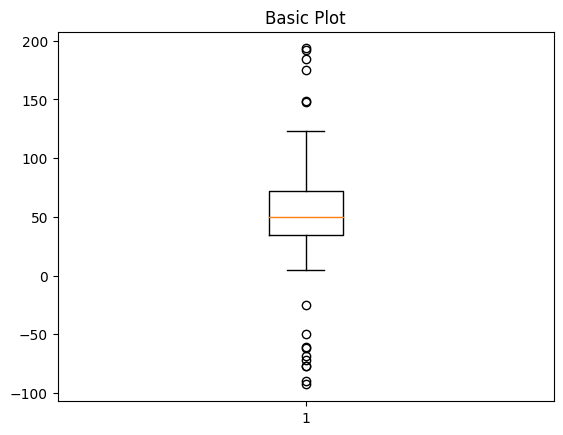

In [ ]:
#Code source: MatPlotLib Official Documentation

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# Create some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

In the figure above, the circular data points are plotted far away from the box, meaning they are outliers.  

## Your task:
Given the following dataframe, plot box-plot for column X.

Hint: You can use matplotlib to plot each column separately. Or, look for pandas library boxplot that plots boxplot for the dataframe directly.


In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(100, 3), columns=['X', 'Y', 'Z'])

In [ ]:
#YOUR CODE


# Your task:

You are given a dataset of test scores for a class. Use Python and Matplotlib to create a box plot of the scores. Analyze the box plot and describe what the median, quartiles, and potential outliers reveal about the distribution of test scores.

Test Scores: [85, 90, 72, 68, 78, 94, 55, 98, 120, 60, 105, 82, 76, 89]

In [ ]:
#YOUR CODE

# Scatter plot

A scatter plot is a data visualization technique that displays individual data points as dots on a two-dimensional plane. It is used to visualize relationships or patterns between two variables.

Draw a scatter plot to find outliers in a the marks obtained by a class in Computer Science and Biology. Assume there are 8 students in the class.  


- cs_marks = [88, 92, 80, 89, 100, 80, 60, 100]
- biology_marks = [35, 79, 29, 48, 97, 30, 32, 45]

Give different colors for CS_marks and Biology_masks plot. What can you observe from the plot?

Hint: Use scatter plot from matplotlib library.

In [ ]:
# YOUR CODE

# Exercise:

Suppose you have data on the number of hours studied and the corresponding test scores of a group of students. A scatter plot can help you examine whether there is a correlation between the number of hours studied and test scores. Each dot on the plot represents a student, with the x-coordinate indicating hours studied and the y-coordinate representing test scores.

Given data on the number of hours studied and test scores, create a scatter plot using Python and Matplotlib. Interpret the scatter plot to determine whether there is a relationship between the two variables.

- Hours Studied: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- Test Scores: [50, 55, 62, 68, 72, 75, 80, 85, 90, 95]

In [ ]:
#YOUR CODE

# Handling Outliers



# Handling Outliers Using Log Transformation

Log transformation is useful for dealing with positively skewed data. By taking the natural logarithm of data points, you can reduce the influence of extreme values.

Example: You have a dataset of website page load times. Log transformation can help make the data more symmetric and reduce the impact of unusually long load times.

Exercise: Given a dataset of website page load times, apply log transformation to the data and visualize the impact on data distribution and outlier handling.

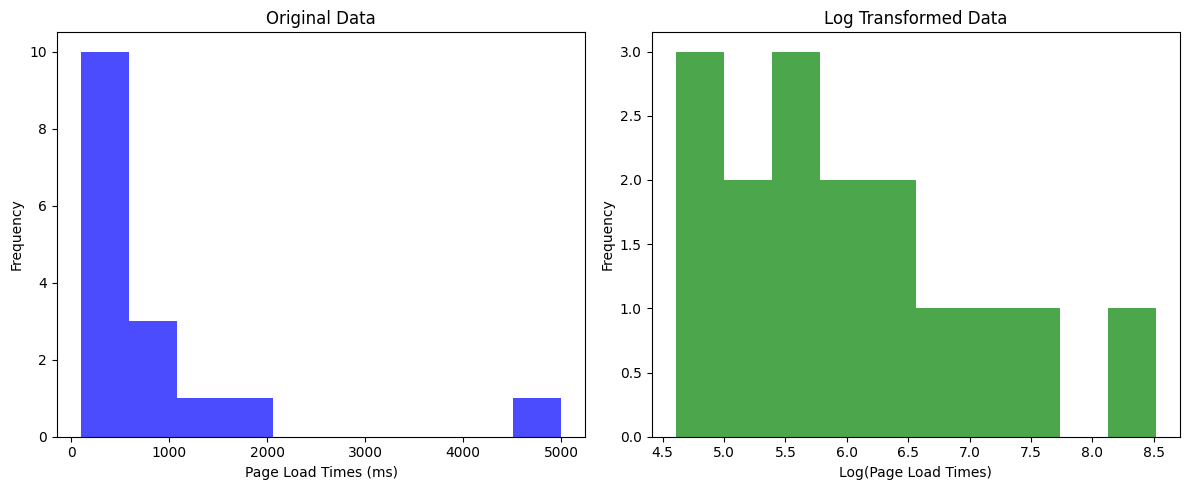

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
page_load_times = [100, 120, 130, 150, 200, 220, 250, 300, 350, 400, 600, 700, 1000, 1500, 2000, 5000]

# Apply log transformation to the data
log_transformed_data = np.log(page_load_times)

# Plot the original and transformed data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(page_load_times, bins=10, color='blue', alpha=0.7)
plt.title("Original Data")
plt.xlabel("Page Load Times (ms)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(log_transformed_data, bins=10, color='green', alpha=0.7)
plt.title("Log Transformed Data")
plt.xlabel("Log(Page Load Times)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In this solution, we applied a natural logarithm (log) transformation to the original dataset of page load times. The log transformation helps reduce the influence of extreme values and makes the data distribution more symmetric.

As you can see in the side-by-side histograms, the log-transformed data shows a more balanced distribution, and the impact of the outlier is less pronounced.

# Exercise:

Imagine you have a dataset of product purchase prices from an e-commerce website. The dataset exhibits a positive skew, with a few high-value purchases. In this exercise, you will apply a log transformation to the dataset and compare the distributions before and after transformation.

Follow these steps to handle outliers using log transformation:

- Given a dataset of product purchase prices, apply the natural logarithm (log) transformation to the data.
- Create histograms to visualize the data distribution before and after log transformation.
- Describe the impact of log transformation on the data distribution and outlier handling.

- Purchase Prices (in dollars): [10, 15, 20, 25, 30, 50, 80, 100, 120, 150, 200, 250, 500, 1000, 1500, 2000]


In [ ]:
#YOUR CODE

# Handling Outliers Using Trimming

Trimming involves removing a certain percentage of data points from both ends of the dataset to eliminate extreme values without imputing or modifying the data.

Example: You have a dataset of monthly customer transaction amounts. Trimming can help you focus on typical customer spending patterns while excluding unusually high or low transactions.

Given a dataset of monthly customer transaction amounts, perform trimming by removing the top and bottom 10% of data points and compare the modified dataset with the original one.

In [ ]:
import numpy as np

# Given data
transaction_amounts = [100, 120, 130, 150, 500, 600, 800, 850, 900, 950, 1000, 1200, 1500, 2000, 5000, 8000]

# Define trimming percentage (top and bottom)
trim_percentage = 10  # 10% trimming

# Calculate the number of data points to trim from each end
num_points_to_trim = int(len(transaction_amounts) * (trim_percentage / 100))

# Sort the data in ascending order
sorted_data = np.sort(transaction_amounts)

# Perform trimming
trimmed_data = sorted_data[num_points_to_trim:-num_points_to_trim]

# Print the original and trimmed data
print("Original Data:")
print(transaction_amounts)
print("\nTrimmed Data:")
print(trimmed_data)


Original Data:
[100, 120, 130, 150, 500, 600, 800, 850, 900, 950, 1000, 1200, 1500, 2000, 5000, 8000]

Trimmed Data:
[ 120  130  150  500  600  800  850  900  950 1000 1200 1500 2000 5000]


# Exercise:

Consider a dataset of monthly electricity bills for a set of households. The dataset exhibits some extreme values, likely due to unusually high or low consumption. In this exercise, you will perform trimming by removing the top and bottom 15% of data points and compare the modified dataset with the original one.

Follow these steps to handle outliers using trimming:

- Given a dataset of monthly electricity bills, calculate the number of data points to trim from both ends (15% from each end).
- Sort the data in ascending order.
- Perform trimming to create a modified dataset with the extreme values removed.
- Compare the original dataset with the trimmed dataset.

- Data Electricity Bills (in dollars): [60, 70, 75, 80, 90, 120, 130, 140, 150, 160, 180, 190, 250, 300, 600, 1000]


In [ ]:
#YOUR CODE

# Scaling data

The two common ways of scaling data are Normalization and Standardization. These techniques are essential when dealing with numerical features that have different ranges, especially for algorithms that rely on distance metrics like k-NN or k-Means.

## Normalization (Min-Max Scaling):

Normalization scales the features to a specific range, typically between 0 and 1. It's suitable when the original data does not follow a normal distribution and when you want to preserve the relationships between features.

In [ ]:
import numpy as np

# Given data
data = np.array([10, 20, 30, 40, 50])

# Normalize the data to the range [0, 1]
min_val = min(data)
max_val = max(data)
normalized_data = (data - min_val) / (max_val - min_val)

print("Original Data:", data)
print("Normalized Data:", normalized_data)


Original Data: [10 20 30 40 50]
Normalized Data: [0.   0.25 0.5  0.75 1.  ]


## Exercise:

Given a dataset of temperature values (in degrees Celsius) from a weather station, perform Min-Max scaling (Normalization) to map the temperatures to the range [0, 1]. Explain how this scaling affects the data distribution.

- Temperatures (in °C): [10, 15, 20, 25, 30, 35, 40, 45, 50]

In [ ]:
#YOUR CODE

# Standardization (Z-Score Scaling):

Standardization scales the features to have a mean of 0 and a standard deviation of 1. It is suitable when the data follows a normal distribution and when you want to center the data around the mean.




In [ ]:
import numpy as np

# Given data
data = np.array([10, 20, 30, 40, 50])

# Standardize the data (Z-Score scaling)
mean = np.mean(data)
std_dev = np.std(data)
standardized_data = (data - mean) / std_dev

print("Original Data:", data)
print("Standardized Data:", standardized_data)


Original Data: [10 20 30 40 50]
Standardized Data: [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


# Exercise:

Given a dataset of exam scores, standardize the scores using Z-Score scaling. Calculate the mean and standard deviation of the original scores and explain how Z-Score scaling transforms the data.

- Exam Scores: [60, 65, 70, 75, 80, 85, 90, 95, 100, 105]



In [ ]:
#YOUR CODE

# Data Imbalance

Imbalanced classification involves training predictive models that have a severe class imbalance in the training data. Such datasets will create a model that ignores and hence, produce poor performance on minority class. Too few examples of the minority class fails a model to effectively learn the decision boundary.

We can solve this problem by oversampling the examples from the minority class. One way to perform this is to duplicate examples from the minority class in the training dataset ; however, this method does not provide any new information for training hthe model. An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of effective data augmentation suitable for tabular data. For example: Synthetic Minority Oversampling TEchnique (SMOTE) selects examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Lets see how we can achieve this. We will use the implementations provided by the imbalanced-learn Python library, which can be installed via pip.

In [ ]:
pip install imbalanced-learn

In [ ]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

We can use the make_classification() scikit-learn function to create a synthetic binary classification dataset with 10,000 examples and a 1:100 class distribution.

In [ ]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

We can use the Counter object to summarize the number of examples in each class to confirm the dataset was created correctly.

In [ ]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


Finally, we can create a scatter plot of the dataset and color the examples for each class a different color to clearly see the spatial nature of the class imbalance.

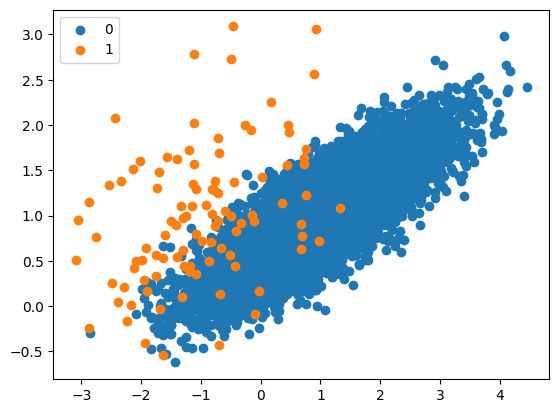

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

A scatter plot of the dataset is created showing the large mass of points that belong to the majority class (blue) and a small number of points spread out for the minority class (orange). We can see some measure of overlap between the two classes.

# SMOTE:

We can oversample the minority class using SMOTE and plot the transformed dataset.

We can use the SMOTE implementation provided by the imbalanced-learn Python library in the SMOTE class.

The SMOTE class acts like a data transform object from scikit-learn in that it must be defined and configured, fit on a dataset, then applied to create a new transformed version of the dataset.

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

In [ ]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


We can define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Once transformed, we can summarize the class distribution of the new transformed dataset, which would expect to now be balanced through the creation of many new synthetic examples in the minority class.

In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


A scatter plot of the transformed dataset can also be created and we would expect to see many more examples for the minority class on lines between the original examples in the minority class.

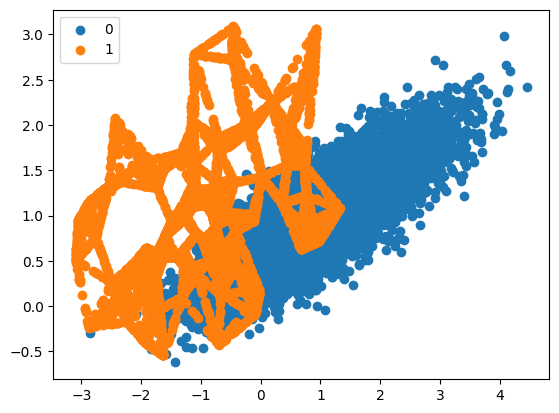

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#Approach 2:

The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

The imbalanced-learn library supports random undersampling via the RandomUnderSampler class.

In [ ]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [ ]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).

To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes.

In [ ]:
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

We can then chain these two transforms together into a Pipeline.

The Pipeline can then be applied to a dataset, performing each transformation in turn and returning a final dataset with the accumulation of the transform applied to it, in this case oversampling followed by undersampling.

In [ ]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

The pipeline can then be fit and applied to our dataset just like a single transform:

In [ ]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 1980, 1: 990})


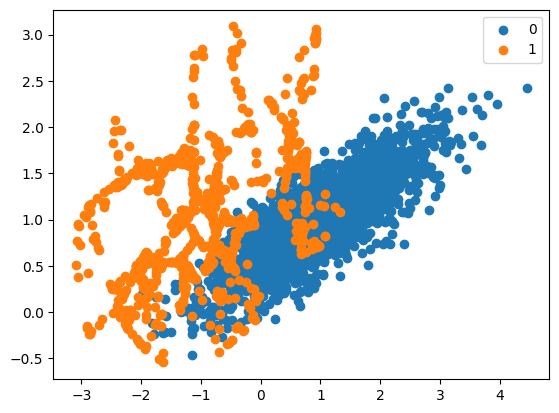

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

We would expect some SMOTE oversampling of the minority class, although not as much as before where the dataset was balanced. We also expect fewer examples in the majority class via random undersampling.

This section for SMOTE was referenced from: https://machinelearningmastery.com/

# Exercise:

Given an imbalance dataset below, apply SMOTE to balance the training dataset Visualize the imbalance dataset and balanced dataset after applying SMOTE.

Answer the following questions:
- What does the original imbalanced dataset look like?
- How does SMOTE help balance the dataset?
- Why is it important to balance the dataset in a machine learning task?

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Generating an imbalanced dataset with specified class weights
X, y = make_classification(
    n_classes=2,
    class_sep=2,
    weights=[0.2, 0.8],  # Class weights for an imbalance ratio)
    n_informative=3,
    n_redundant=1,
    flip_y=0,
    n_features=5,
    n_clusters_per_class=1,
    n_samples=200,
    random_state=42
)

# 'X' contains the features, and 'y' contains the labels (0 or 1) in an imbalanced ratio.


In [ ]:
#YOUR CODE TO VISUALIZE THE DATA

In [ ]:
#YOUR CODE TO APPLY SMOTE

In [ ]:
#YOUR CODE TO VISUALIZE THE BALANCED DATA

# Exercise:

Can you train a classification model on both the imbalanced and balanced datasets and observe the difference in the model's performance in terms of accuracy, precsion, recall and F1-score?

In [ ]:
#YOUR CODE